# Function approximation with PyTorch by creating a multilayer perceptron

## Package imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

# variable has 'cuda' or 'cpu' in it
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda', index=0)

In [2]:
# from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# from IPython.core.debugger import set_trace

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

# The Problem

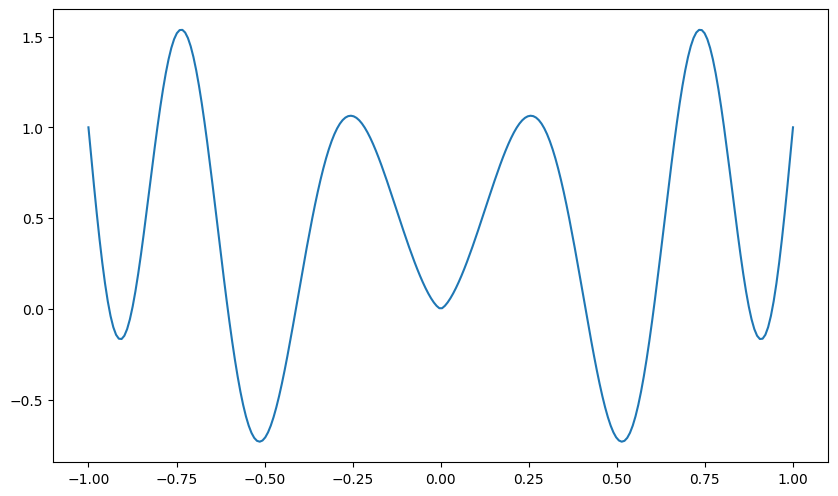

In [3]:
n_features = 1

n_samples = 256; # number of samples

x = np.linspace(-1,1,n_samples)
y = np.sin(4*np.pi*np.abs(x)**1.5) + np.abs(x)**2
x = x[:,None]
y = y[:,None]
plt.clf
plt.plot(x, y)

In [4]:
y.shape

(256, 1)

# The Solution

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float() # reshaping not required

In [6]:
y.shape

torch.Size([256, 1])

In [7]:
# class to create mutilayer perceptron model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        # self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        # self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x): # gets data -> passes through linear layer
        out = self.l1(x)
        out = self.tanh(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

# model = NeuralNet(input_size, hidden_size, output_size)
# model = NeuralNet(1, 10, 1)

In [8]:
DEVICE # checking here, otherwise can assert

device(type='cuda', index=0)

In [9]:
model = NeuralNet(1, 200, 1).to(DEVICE)  # <-- here, move model to GPU. Why? Para. opt.
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) # passing all parameters, partial possible, diff. lr
# optimizer = optim.SGD(model.parameters(), lr=0.01)

x, y = x.to(DEVICE), y.to(DEVICE)  # <-- here, move data to GPU. Why? Calc. on GPU

In [10]:
model.l1.weight

Parameter containing:
tensor([[ 0.1187],
        [-0.3776],
        [ 0.6788],
        [-0.3091],
        [-0.9671],
        [ 0.5850],
        [-0.7322],
        [ 0.6581],
        [ 0.7300],
        [ 0.3277],
        [-0.0819],
        [-0.2709],
        [-0.1250],
        [-0.4415],
        [-0.4702],
        [-0.2515],
        [-0.3216],
        [-0.4773],
        [-0.1511],
        [-0.5988],
        [-0.9838],
        [-0.3932],
        [-0.2239],
        [ 0.3995],
        [-0.3253],
        [-0.4850],
        [-0.4682],
        [-0.7224],
        [-0.9807],
        [-0.9542],
        [-0.7139],
        [-0.2185],
        [ 0.7284],
        [-0.2533],
        [ 0.2728],
        [-0.8999],
        [-0.7795],
        [-0.2962],
        [ 0.8664],
        [-0.0524],
        [-0.4423],
        [ 0.7347],
        [ 0.1346],
        [-0.0760],
        [-0.6234],
        [-0.2270],
        [-0.7246],
        [ 0.7240],
        [-0.6520],
        [-0.4907],
        [-0.4494],
        [

In [11]:
model.l1.bias

Parameter containing:
tensor([-0.7482, -0.2034,  0.0058, -0.5453, -0.7952,  0.6250, -0.3478,  0.5015,
         0.2948, -0.3277,  0.1867,  0.1652, -0.1584, -0.7639,  0.7931, -0.6654,
        -0.4686, -0.3184,  0.4102,  0.7563, -0.3984, -0.6646, -0.7369,  0.0507,
        -0.7853,  0.8789,  0.1067,  0.4171, -0.1346, -0.7430,  0.1821,  0.6245,
         0.3226, -0.0508, -0.1589, -0.0887, -0.5618,  0.8969, -0.7228,  0.8286,
        -0.8328, -0.7778,  0.3114,  0.7693,  0.5550,  0.6438,  0.4581,  0.8248,
         0.3299,  0.5118, -0.1241, -0.6791, -0.4423,  0.8340, -0.9551,  0.1812,
         0.3308,  0.2571, -0.5778, -0.4413, -0.6051,  0.3201, -0.5485,  0.2079,
        -0.4753, -0.4919,  0.7700, -0.5810, -0.2285,  0.8993,  0.6104, -0.6178,
        -0.9238,  0.9481, -0.5504,  0.7431, -0.1636, -0.3660, -0.2462, -0.0872,
         0.0898, -0.2098,  0.8850,  0.0851, -0.2882, -0.4203, -0.3605, -0.1562,
         0.2428, -0.3419, -0.4239, -0.5608, -0.5655, -0.3397, -0.9686,  0.9866,
         0.6532,  

In [12]:
## takes in a module and applies the specified weight initialization
def weights_init_normal(m):
    '''Takes in a module and initializes all linear layers with weight
        values taken from a normal distribution.'''

    classname = m.__class__.__name__
    # for every Linear layer in a model
    if classname.find('Linear') != -1:
        y = m.in_features
    # m.weight.data shoud be taken from a normal distribution
        m.weight.data.normal_(0.0,1/np.sqrt(y))
    # m.bias.data should be 0
        m.bias.data.fill_(0)

In [13]:
model.apply(weights_init_normal)

NeuralNet(
  (l1): Linear(in_features=1, out_features=200, bias=True)
  (tanh): Tanh()
  (l2): Linear(in_features=200, out_features=1, bias=True)
)

In [14]:
model.l1.weight

Parameter containing:
tensor([[-0.2022],
        [-1.3227],
        [-0.2200],
        [-0.5876],
        [ 0.8299],
        [ 1.9013],
        [-1.3645],
        [-0.6767],
        [ 1.6120],
        [ 0.0609],
        [-0.1221],
        [ 2.6472],
        [-0.9657],
        [-2.0907],
        [ 1.0641],
        [ 0.4782],
        [-1.6212],
        [ 1.6489],
        [ 0.0976],
        [-0.2413],
        [-0.5443],
        [-0.1183],
        [-0.9903],
        [ 0.5184],
        [ 0.6633],
        [ 0.1778],
        [-0.9045],
        [ 1.1884],
        [ 1.0628],
        [-2.1575],
        [-0.3811],
        [ 0.0318],
        [ 0.5387],
        [ 0.5329],
        [-0.8551],
        [-1.2930],
        [ 0.0605],
        [ 0.3036],
        [ 0.3015],
        [-0.1524],
        [-0.9175],
        [-1.7044],
        [ 0.0683],
        [-0.1110],
        [-0.2921],
        [-0.7150],
        [ 1.3217],
        [-0.7198],
        [ 0.0667],
        [ 0.1513],
        [-1.3508],
        [

In [15]:
model.l1.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0', requires_grad=True)

In [16]:
def torch2np(x):
  return x.detach().cpu().numpy()

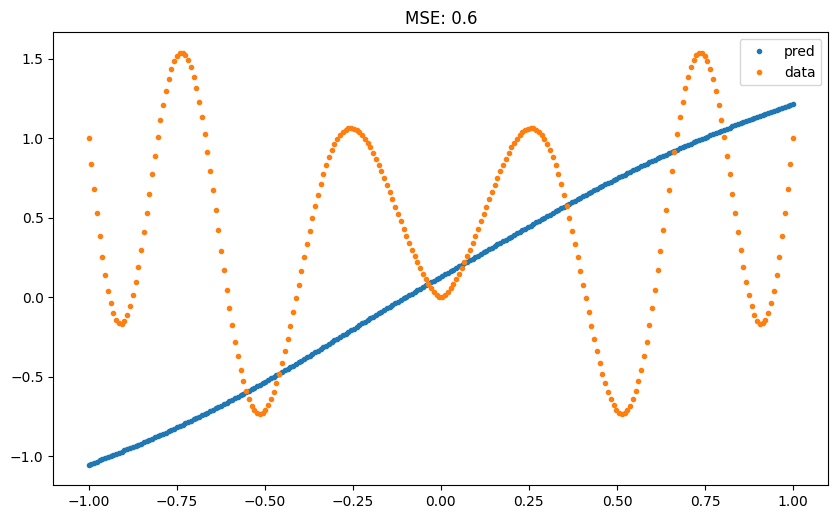

In [17]:
# Training step
model.train()  # <-- here, set the model in train mode (dropout)
optimizer.zero_grad() # nulls gradient, otherwise accumulates

y_ = model(x) # pass data through model and get prediction
loss = loss_fn(y_, y)

loss.backward() # backward pass
optimizer.step() # updates parameters of our model

# Ideally, data below is for validation
model.eval()  # <-- here, set the model in eval mode
with torch.no_grad(): # not interested in gradients
    y_ = model(x)    
    
# Vizualize
fig, ax = plt.subplots()
ax.plot(torch2np(x), torch2np(y_), ".", label="pred")
ax.plot(torch2np(x), torch2np(y), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

In [18]:
num_epochs = 1000

Epochs and iterations are units of measurement for the amount of neural network training. We want our neural networks to train quickly. We want the highest accuracy or lowest error with the fewest number of iterations or epochs. Choice of batch size can affect how quickly our neural network can achieve a certain accuracy.

- epoch = 1 forward and backward pass of ALL training samples. An epoch is a measure of the number of times all training data is used once to update the parameters
- batch size = number of training samples in one forward and backward pass
- number of iterations = number of passes, each pass using [batch_size] number of samples. Each pass corresponds to one parameter update step. That is, in each iteration, each parameter is updated once
- e.g. 100 samples, batch size = 20 --> 5 iterations for 1 epoch. What do we have here?

Epoch [1/1000], Loss: 0.9818
Epoch [2/1000], Loss: 0.4702
Epoch [3/1000], Loss: 0.5114
Epoch [4/1000], Loss: 0.6656
Epoch [5/1000], Loss: 0.5796
Epoch [6/1000], Loss: 0.4451
Epoch [7/1000], Loss: 0.4305
Epoch [8/1000], Loss: 0.5161
Epoch [9/1000], Loss: 0.5649
Epoch [10/1000], Loss: 0.5200
Epoch [11/1000], Loss: 0.4400
Epoch [12/1000], Loss: 0.4011
Epoch [13/1000], Loss: 0.4225
Epoch [14/1000], Loss: 0.4596
Epoch [15/1000], Loss: 0.4638
Epoch [16/1000], Loss: 0.4338
Epoch [17/1000], Loss: 0.4041
Epoch [18/1000], Loss: 0.4031
Epoch [19/1000], Loss: 0.4253
Epoch [20/1000], Loss: 0.4422
Epoch [21/1000], Loss: 0.4349
Epoch [22/1000], Loss: 0.4121
Epoch [23/1000], Loss: 0.3958
Epoch [24/1000], Loss: 0.3978
Epoch [25/1000], Loss: 0.4097
Epoch [26/1000], Loss: 0.4146
Epoch [27/1000], Loss: 0.4070
Epoch [28/1000], Loss: 0.3960
Epoch [29/1000], Loss: 0.3934
Epoch [30/1000], Loss: 0.4000
Epoch [31/1000], Loss: 0.4067
Epoch [32/1000], Loss: 0.4051
Epoch [33/1000], Loss: 0.3973
Epoch [34/1000], Lo

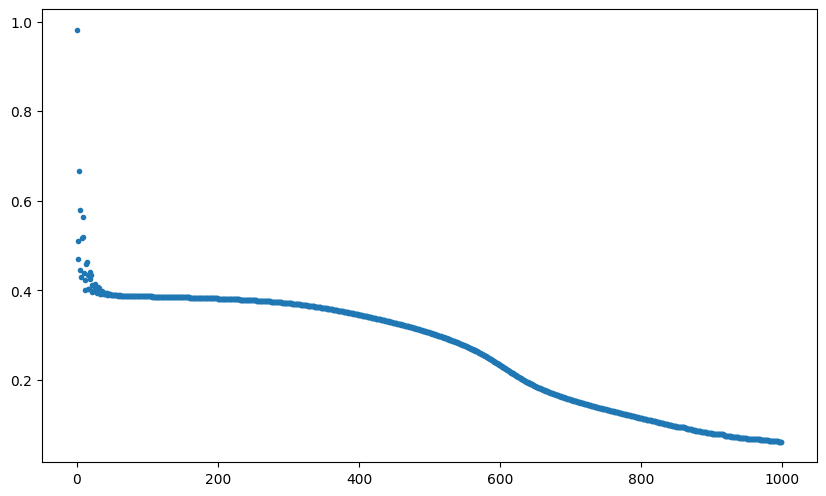

In [19]:
model.train()  # <-- here, set the model in train mode

loss_epoch = [] # to collect the loss during each epoch 

# Train the model
#n_total_steps = x.shape[0]
for epoch in range(num_epochs):
    #for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
    optimizer.zero_grad() # nulls gradient, otherwise accumulates

    y_ = model(x) # pass data through model and get prediction
    loss = loss_fn(y_, y)

    loss.backward() # backward pass
    optimizer.step() # updates parameters of our model
        
        #if (i+1) % 100 == 0:
    print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    loss_epoch.append(loss.item())

# plt.plot(np.log(loss_epoch))
plt.plot(loss_epoch, '.')

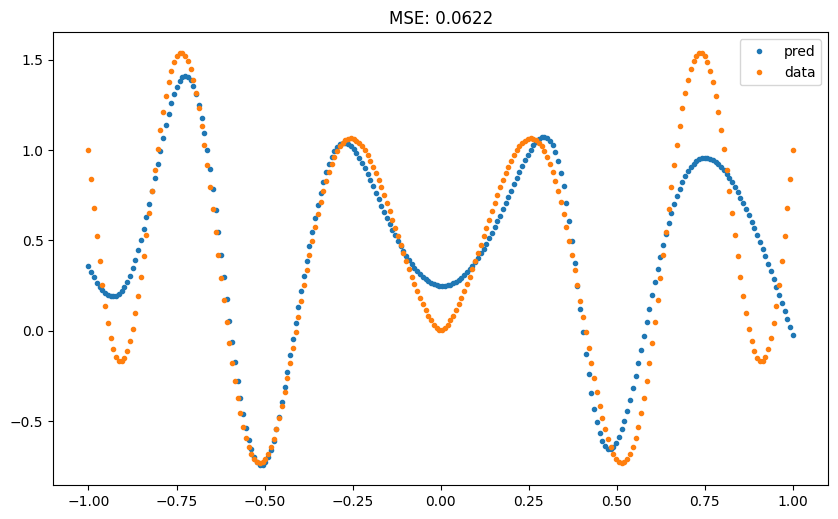

In [20]:
# Ideally, data below is for validation
model.eval()  # <-- here, set the model in eval mode
with torch.no_grad(): # not interested in gradients
    y_ = model(x)    
    
# Vizualize
fig, ax = plt.subplots()
ax.plot(x.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(x.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.4f}")
ax.legend();

Note: I did gradient descent with all the data. I did not split the data into `train` and `valid` which could be done!

# Try on your own:
- Play with number of neurons, layers, training samples, etc.
- Observe the loss for these cases. Can we have a notion of convergence?